<img src="http://sonetodigital.com.br/adm/wp-content/uploads/2018/12/logo-fiap.png" width="150" align="left"/>

<br/><br/>

<font size=5 color="#ed145b"><b> Engenharia da Computação </b></font><font size=5 color="#ed145b"> - Inteligência Artificial e computacional </font>

<font size=5 color="#ed145b"><b> Análise do Dataset bikes.csv </b></font><font size=5 color="#ed145b"> - 3ºECR

<font size=3 color="#ed145b"><b> Membros: </b></font>

<font size=3 color="#000000"> Felipe Torigoe - RM 79896
    <br> Guilherme Fujii - RM 79932
    <br> Matheus Issao Bocci - RM 81542
    <br> Matheus Pereira Nascimento - RM 81618
    <br> Richard Rodrigues Silva - RM 80906

### Informações sobre o dataset

Esse conjunto de dados apresenta informações sobre o sistema de compartilhamento de bicicletas, o que é basicamente a forma mais atual para alugar esse meio de transporte. Todo o processo é realizado automaticamente: cadastro, aluguel e devolução.
O usuário, através do sistema, localiza a bicicleta mais próxima e a retira, podendo retornar em qualquer outro local. Atualmente, existem cerca de 500 sistemas de compartilhamento ao redor do mundo, que envolvem mais de 500 mil bicicletas. O grande interesse por informações consiste no seu importante papel nos problemas de tráfego, ambientais e de saúde.

Os sistemas de compartilhamento de bicicletas são também atrativos por conta dos seus dados gerados e da possibilidade de estudo feito sobre eles. Ao contrário de transportes como ônibus ou metrô, a duração do percurso, a partida e a posição de chegada são explicitamente registradas nesses sistemas. Esse recurso transforma o sistema de compartilhamento de bicicletas em uma rede virtual de sensores que pode ser usada para detectar a mobilidade na cidade.

Para mais informações do dataset, o site: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset pode ser consultado.

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [266]:
data = pd.read_csv("data/bikes.csv")
data = data.drop(columns=['target','mkt'])
data.head()

,city,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,stock,cnt
0,city_0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,997,929
1,city_0,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,1231,765
2,city_0,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1395,1395
3,city_0,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1651,1641
4,city_0,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,2334,1671


In [267]:
def sname(season):
    if (season == 1):
        return 'winter'
    elif (season == 2):
        return 'spring'
    elif (season == 3):
        return 'summer'
    else:
        return 'fall'

data['sname'] = data.season.apply(sname)

In [268]:
def dname(weekday):
    if (weekday == 0):
        return 'sunday'
    elif (weekday == 1):
        return 'monday'
    elif (weekday == 2):
        return 'tuesday'
    elif (weekday == 3):
        return 'wednesday'
    elif (weekday == 4):
        return 'thursday'
    elif (weekday == 5):
        return 'friday'
    else:
        return 'saturday'
    
data['dname'] = data.weekday.apply(dname)

In [269]:
def year(yr):
    if (yr == 0):
        return 2011
    else:
        return 2012
data['year'] = data.yr.apply(year)

In [270]:
def rtemp(temp):
    return (temp * 47) - 8

data['rtemp'] = data.temp.apply(rtemp)

In [271]:
def ratemp(atemp):
    return (atemp * 47) - 8

data['ratemp'] = data.temp.apply(ratemp)

# Análise da dataset

<div class="alert alert-block alert-info">
<b>Crescimento entre os anos de 2011 e 2012</b>
    <br>A primeira análise que pensamos em fazer é comparando em qual dos dois anos (2011 ou 2012) houve um maior número de aluguel de bicicletas.
</div>

In [272]:
#Agrupando por ano a média contagem de bicicletas alugadas
data.groupby(by = 'year')['cnt'].mean()

year
2011    3599.563205
2012    5679.657951
Name: cnt, dtype: float64

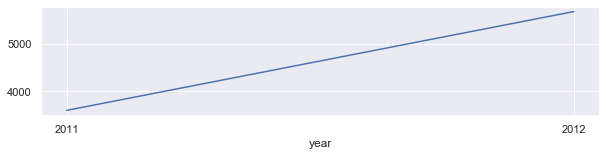

In [273]:
#Plotando os resultados acima em gráfico

plt.figure(figsize=(10,2))
_ = data.groupby(by=['year'])['cnt'].mean().plot(xticks = ([2011,2012]))

<div class="alert alert-block alert-success">
    Conseguimos concluir que no ano de 2012, houve um maior uso nos sistemas de compartilhamento. Provavelmente, por conta da maior disseminação desse tipo de sistema e da crescente adoção do uso dos smartphones.
</div>

<div class="alert alert-block alert-info">
<b>Olhando agora para os meses</b>
<br>Outra análise a ser feita é a relação da quantidade de bicicletas alugadas ao longo dos meses.
</div>

In [274]:
#Agrupando por meses a média da contagem de bicicletas alugadas

data.groupby('mnth')['cnt'].mean()

mnth
1     2240.093145
2     2984.896316
3     3965.533145
4     4667.588917
5     5484.249194
6     5869.494500
7     5621.544919
8     5755.667500
9     5827.898083
10    5320.432742
11    4331.533583
12    3558.695242
Name: cnt, dtype: float64

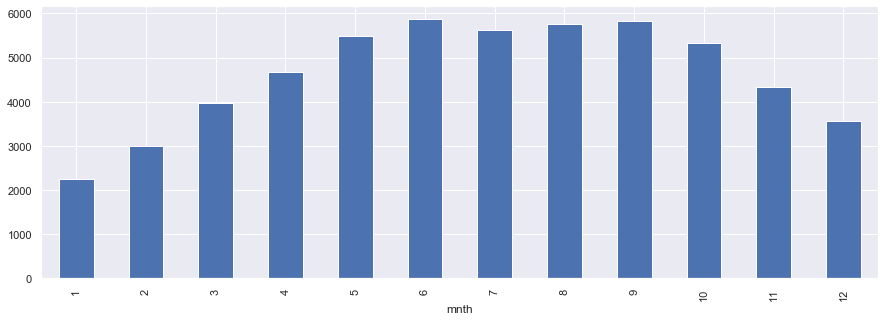

In [275]:
#Plotando os resultados acima em gráfico

plt.figure(figsize=(15,5))
_ = data.groupby(['mnth'])['cnt'].mean().plot(kind='bar')

<div class="alert alert-block alert-success">
A partir dessa observação, conseguimos concluir que o maior volume de alugués ocorreu do mês 5 ao mês 10, tendo seu pico entre os meses de junho e agosto. <br>
Temos ciência de que, durante os 3 meses em que ocorre o pico, os estudantes americanos estão em seu período de férias, sabemos também que o verão nos Estados Unidos se estende de junho a setembro. Portanto, os números de locação podem se justificar por esse motivos.
</div>

<div class="alert alert-block alert-info">
<b>Vamos tomar como análise os alugueis nos finais de semana e nos feriados</b>

- Analisando a média de alugueis nos dias da semana
</div>

In [276]:
data.groupby(by = 'dname')['cnt'].mean()

dname
friday       4824.593077
monday       4478.692000
saturday     4686.245048
sunday       4360.923714
thursday     4804.061010
tuesday      4648.866058
wednesday    4687.672163
Name: cnt, dtype: float64

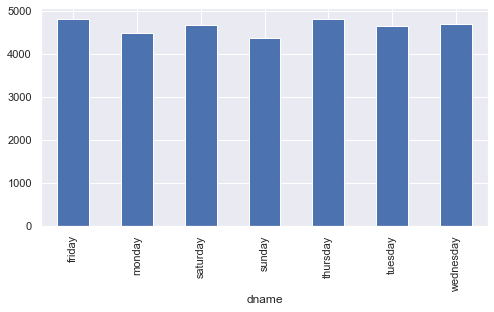

In [277]:
plt.figure(figsize=(8,4))
_ = data.groupby(['dname'])['cnt'].mean().plot(kind='bar')

<div class="alert alert-block alert-info">

- Agora, olhando para o final de semana...
</div>

In [278]:
weekend = data[(data['weekday'] == 0) | (data['weekday'] == 6)]
weekend.groupby(by = 'dname')['cnt'].mean()

dname
saturday    4686.245048
sunday      4360.923714
Name: cnt, dtype: float64

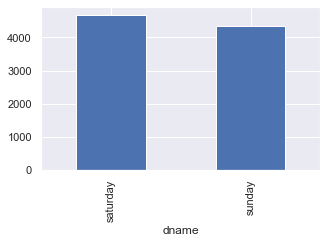

In [279]:
plt.figure(figsize=(5,3))
_ = tmp.groupby(['dname'])['cnt'].mean().plot(kind='bar')

<div class="alert alert-block alert-success">
Com essa análise, chegamos a conclusão de que o dia com mais alugueis dentro do final de semana é no sábado, considerando o valor total dos alugueis.
<br><br>
Partindo para uma análise mais afundo, analisaremos o número de feriados nos finais de semana.
</div>

- _Separando os finais de semana onde o weekday 6 (sábado) era feriado._

In [280]:
data[(data['weekday'] == 6) & (data['holiday'] == 1)]

,city,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,stock,cnt,sname,dname,year,rtemp,ratemp


<div class="alert alert-block alert-success">
Podemos observar que não houve feriados no sábado no período em que o dataset foi feito. Por conta disso iremos analisar em quais dias o aluguel tem maior volume. Sábados ou Feriados.
</div>

In [281]:
data.groupby(by = 'holiday')['cnt'].mean()

holiday
0    4663.869077
1    3868.968333
Name: cnt, dtype: float64

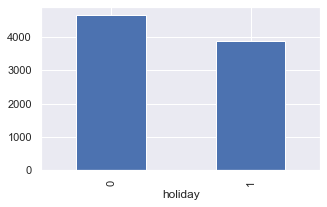

In [282]:
plt.figure(figsize=(5,3))
holidaygraph = data.groupby(['holiday'])['cnt'].mean().plot(kind='bar')

In [283]:
weekend.groupby(by = ['dname'])['cnt'].mean()

dname
saturday    4686.245048
sunday      4360.923714
Name: cnt, dtype: float64

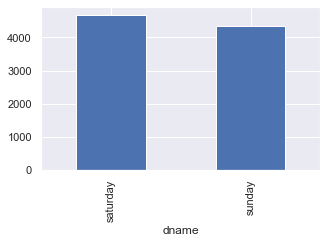

In [284]:
plt.figure(figsize=(5,3))
weekendgraph = weekend.groupby(by=['dname'])['cnt'].mean().plot(kind='bar')

<div class="alert alert-block alert-success">
Após essa análise, podemos confirmar que em finais de semana houve muito mais alugueis do que em feriados. Análise que pode ser feita também pensando que o número de feriados no ano é um valor muito mais baixo do que o número de finais de semana no ano, fazendo com que o número de alugueis em finais de semana seja maior.
</div>

<div class="alert alert-block alert-info">
<b>Estações do ano e seus numeros</b>

- Analisando a média de alugueis por estação
</div>

In [285]:
data.groupby(by=['sname'])['cnt'].mean()

sname
fall      4839.541545
spring    5149.690136
summer    5718.733218
winter    2809.348923
Name: cnt, dtype: float64

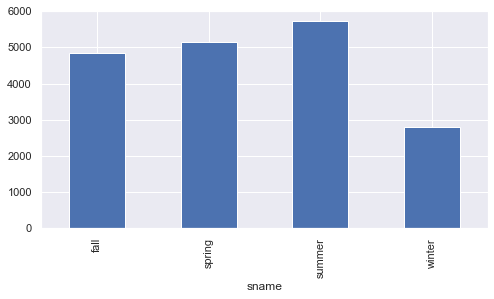

In [286]:
plt.figure(figsize=(8,4))
_ = data.groupby(['sname'])['cnt'].mean().plot(kind='bar')

 <div class="alert alert-block alert-success">
A estação do ano que menos houve alugueis de bike foi o inverno, o que era esperado. Porém no inverno qual foi o dia com mais alugueis.
</div>

In [287]:
#maior numero de alugueis durante o inverno 
data[(data['season'] == 1)]['cnt'].max()

9149

- _Vamos olhar como estava este dia..._

In [288]:
data[(data['cnt'] == 9149) & (data['season'] == 1)]

,city,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,stock,cnt,sname,dname,year,rtemp,ratemp
31143,city_136,2012-03-17,1,1,3,0,6,0,2,0.514167,0.505046,0.755833,0.110704,9939,9149,winter,saturday,2012,16.165849,16.165849


- O dia parece quente para o inverno, vamos olhar para a média de temperatura para esta estação naquele ano...

In [289]:
#media da sensacao termica durante o inverno
data[(data['season'] == 1) & (data['yr'] == 1)]['ratemp'].mean()

7.119923241758019

<div class="alert alert-block alert-success">
O que pode explicar este fato, é que neste dia a sensaçao térmica estava bem acima do que a média para o inverno naquele ano, apesar de estar um dia nublado, e ainda era <b>Saint Patrick's Day</b> nos EUA que é culturamente comemorado todos os anos, onde os Irlandeses e seus descendentes saem nas ruas comemorando e bebendo a famosa "green beer".
</div>

<div class="alert alert-block alert-info">
    <p>E em 2011, qual foi o dia? &#129300;</p>
</div>

In [290]:
#maior numero de alugueis durante o inverno de 2011
data[(data['season'] == 1) & (data['yr'] == 0)]['cnt'].max()

4559

In [291]:
data[(data['cnt'] == 4559) & (data['season'] == 1) & (data['yr'] == 0)]

,city,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,stock,cnt,sname,dname,year,rtemp,ratemp
59259,city_171,2011-02-18,1,0,2,0,5,1,1,0.521667,0.511983,0.516667,0.264925,4759,4559,winter,friday,2011,16.518349,16.518349


<div class="alert alert-block alert-success">
    <p>Apenas uma sexta-feira mais quente durante o inverno &#128516;</p>
</div>